<a href="https://colab.research.google.com/github/He-Zhao-Jie/Project/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn;sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD,Adam

In [3]:
from zipfile import ZipFile
file_name='nightmarket_train.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
class_names = ['Lehua Night Market','Linjiang Night Market','Nanya Night Market','Ningxia Night Market','Raohe Night Market','Shilin Night Market','South Airport Night Market','Xingren Night Market']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [5]:
def load_data():
    datasets = ['nightmarket_train', 'nightmarket_test']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|          | 0/16 [00:00<?, ?it/s]

Loading nightmarket_train


  0%|          | 0/21 [00:00<?, ?it/s]

Loading nightmarket_test


100%|██████████| 21/21 [00:00<00:00, 921.75it/s]


In [7]:
#%%
'隨機性'
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
'標準化'
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [10]:
#%%
'建模'
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Flatten(),
    Dropout(0.5),
    Dense(8, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, 
                    #validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=128, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 47ms/step - loss: 1.9093 - accuracy: 0.2469
Epoch 2/100
2/2 [==============================] - 0s 48ms/step - loss: 1.9342 - accuracy: 0.2099
Epoch 3/100
2/2 [==============================] - 0s 53ms/step - loss: 1.9017 - accuracy: 0.2346
Epoch 4/100
2/2 [==============================] - 0s 55ms/step - loss: 1.8814 - accuracy: 0.3086
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 1.8261 - accuracy: 0.3519
Epoch 6/100
2/2 [==============================] - 0s 50ms/step - loss: 1.8122 - accuracy: 0.4012
Epoch 7/100
2/2 [==============================] - 0s 48ms/step - loss: 1.7840 - accuracy: 0.4074
Epoch 8/100
2/2 [==============================] - 0s 48ms/step - loss: 1.7223 - accuracy: 0.4383
Epoch 9/100
2/2 [==============================] - 0s 57ms/step - loss: 1.7036 - accuracy: 0.4321
Epoch 10/100
2/2 [==============================] - 0s 48ms/step - loss: 1.6291 - accuracy: 0.4815
Epoch 11/100
2/2 [=

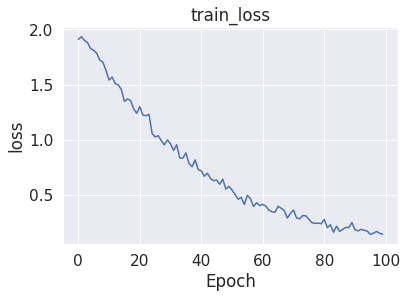

In [13]:
#%%
'模型概況'
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images, test_labels)  
#print('test:',result[1])
#%%

In [14]:
#%%
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

In [16]:
#%%
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

1.0


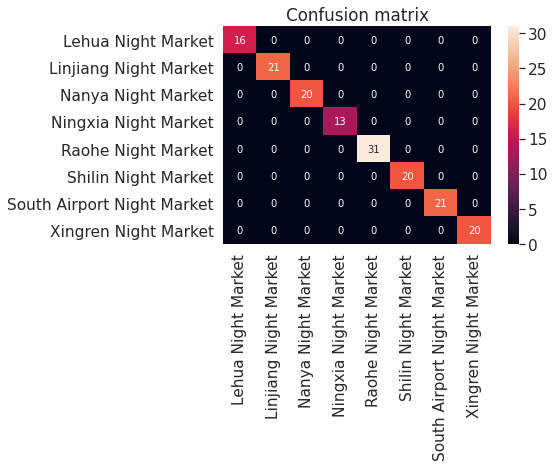

In [17]:
#%%
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

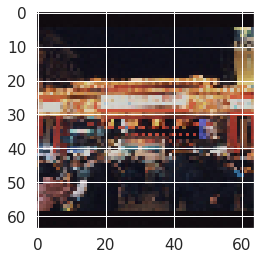

In [19]:
#%%
'任意照片&格式轉換'
IMAGE_PATH='market1.jpg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(64,64))
img=tf.keras.preprocessing.image.img_to_array(img)
plt.imshow(img/255.)

In [23]:
#%%
'辨識'
predictions=model.predict(np.array([img]))
predictions

array([[0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [24]:
list_index=[0,1,2,3,4,5,6,7,8]
x=predictions

for i in range(8):
  for j in range(8):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp

print(list_index)

[4, 1, 2, 3, 0, 5, 6, 7, 8]


In [26]:
for i in range(8):
  print(class_names[list_index[i]],':',round(predictions[0][list_index[i]]*100,2),'%')

Raohe Night Market : 100.0 %
Linjiang Night Market : 0.0 %
Nanya Night Market : 0.0 %
Ningxia Night Market : 0.0 %
Lehua Night Market : 0.0 %
Shilin Night Market : 0.0 %
South Airport Night Market : 0.0 %
Xingren Night Market : 0.0 %
